<a href="https://colab.research.google.com/github/Noob919/COVID_19-XRAY-Classification/blob/main/pristine_DTG_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import Normalizer
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.layers import Dense
from keras import Sequential
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.utils import plot_model

In [3]:
df =  pd.read_csv("/content/PRISTINE PET MP.csv")
df.drop(0, inplace=True)
df.rename(columns={'Unnamed: 3':"Weight loss", 'Unnamed: 4':"DTG",'Unnamed: 5': "label"}, errors="raise",inplace =  True)
df_na = df.dropna()
df_na.tail(5)

,time,tem,heating rate,Weight loss,DTG,label
4050,67.48333333,967.66,14.33924426,56.454816,-0.013943,Validation
4051,67.5,967.85,14.33851852,56.454816,-0.013939,Training
4052,67.51666667,967.97,14.33675636,56.454816,-0.013936,Training
4053,67.53333333,968.2,14.33662389,56.454816,-0.013933,Training
4054,67.55,968.41,14.33619541,56.454816,-0.013929,Training


In [4]:
df_res =  df_na[['time', 'tem', 'heating rate', 'DTG']]
df_res.tail(3)

label = df_na['label']
label = label.reset_index()
def root_series(df):
  df_sq = df*df
  df_sum = df_sq.sum(axis=1)
  root =  pd.Series(data  = df_sum)
  root = pd.DataFrame(np.power(root, 0.5), columns = ['Root'])
  return root

def transformation(DataFrame):
  scaler  = Normalizer()
  transform_df = scaler.fit_transform(DataFrame)
  return transform_df

transform_df = transformation(df_res)
transform_df = pd.DataFrame(transform_df)
transform_df.columns = ['time', 'tem', 'heating rate', 'DTG']
transform_df
dataframe = pd.concat([transform_df,label],axis =1)
dataframe
df_training = dataframe.loc[dataframe['label'] == "Training"]
X =  df_training[['time', 'tem', 'heating rate']]
y = df_training['DTG']

In [5]:
model = keras.Sequential(
    [
        layers.Dense(3, activation="relu"),
        layers.Dense(5, activation="relu"),
        layers.Dense(12, activation="sigmoid"),
        layers.Dense(1),
    ]
)
model.compile(loss='mse', optimizer='adam', metrics=[tf.keras.metrics.RootMeanSquaredError()])
model.fit(X, y, epochs=50, batch_size=10, verbose=1, validation_split=0.4)

Epoch 1/50
195/195 [==============================] - 3s 6ms/step - loss: 0.0016 - root_mean_squared_error: 0.0406 - val_loss: 3.4495e-06 - val_root_mean_squared_error: 0.0019
Epoch 2/50
195/195 [==============================] - 1s 5ms/step - loss: 6.5704e-06 - root_mean_squared_error: 0.0026 - val_loss: 2.8002e-07 - val_root_mean_squared_error: 5.2917e-04
Epoch 3/50
195/195 [==============================] - 1s 5ms/step - loss: 1.4371e-06 - root_mean_squared_error: 0.0012 - val_loss: 8.0762e-08 - val_root_mean_squared_error: 2.8419e-04
Epoch 4/50
195/195 [==============================] - 1s 4ms/step - loss: 1.2654e-06 - root_mean_squared_error: 0.0011 - val_loss: 4.8729e-08 - val_root_mean_squared_error: 2.2075e-04
Epoch 5/50
195/195 [==============================] - 1s 4ms/step - loss: 1.1865e-06 - root_mean_squared_error: 0.0011 - val_loss: 5.5388e-08 - val_root_mean_squared_error: 2.3535e-04
Epoch 6/50
195/195 [==============================] - 1s 4ms/step - loss: 9.6795e-07 - r

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 3)                 12        
                                                                 
 dense_1 (Dense)             (None, 5)                 20        
                                                                 
 dense_2 (Dense)             (None, 12)                72        
                                                                 
 dense_3 (Dense)             (None, 1)                 13        
                                                                 
Total params: 117 (468.00 Byte)
Trainable params: 117 (468.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


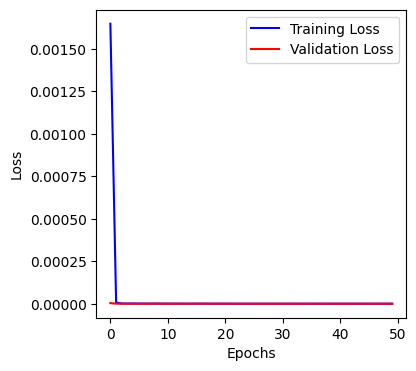

In [8]:
met_df = pd.DataFrame(model.history.history)

# Create a smaller figure with a specified size
plt.figure(figsize=(4, 4))

# Plot the training loss and validation loss
plt.plot(met_df['loss'], label='Training Loss', color='blue')
plt.plot(met_df['val_loss'], label='Validation Loss', color='red')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Show the plot
plt.show()


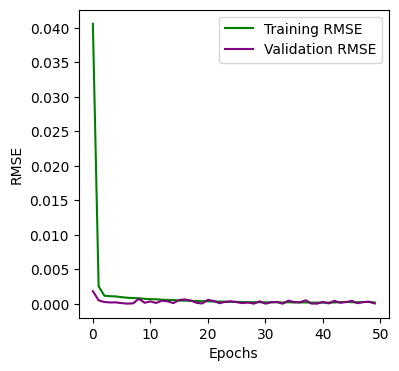

In [10]:
plt.figure(figsize=(4, 4))

# Plot the training RMSE and validation RMSE
plt.plot(met_df['root_mean_squared_error'], label='Training RMSE', color='green')
plt.plot(met_df['val_root_mean_squared_error'], label='Validation RMSE', color='purple')

plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.legend()

# Show the plot
plt.show()

In [11]:
df_val = dataframe.loc[dataframe['label'] == "Validation"]
X_val =  df_val[['time', 'tem', 'heating rate']]
y_val = df_val['DTG']

X_val_df = pd.DataFrame(X_val)
X_val_df = X_val_df.reset_index(drop = True)
predictions = model.predict(X_val)
prediction = pd.DataFrame(predictions)
y_val_df =  pd.DataFrame(y_val)
y_val_df = y_val_df.reset_index(drop= True)
final_df = pd.concat([X_val_df,prediction,y_val_df],axis =1)
final_df.rename(columns={0: "preditions"}, errors="raise",inplace =  True)
final_df

13/13 [==============================] - 0s 2ms/step


,time,tem,heating rate,preditions,DTG
0,0.000004,0.033315,0.999445,0.000808,9.051003e-08
1,0.000313,0.301892,0.953342,0.000334,8.167232e-07
2,0.000523,0.384615,0.923077,0.000292,0.000000e+00
3,0.000817,0.470588,0.882353,0.000247,1.267761e-06
4,0.001354,0.582518,0.812816,0.000185,1.563194e-06
...,...,...,...,...,...
400,0.069270,0.997486,0.014936,0.000054,-8.583528e-07
401,0.069312,0.997484,0.014910,0.000054,-8.573788e-07
402,0.069412,0.997477,0.014858,0.000053,-6.673923e-05
403,0.069495,0.997472,0.014818,0.000053,-1.441698e-05


In [12]:
print('MSE',mean_squared_error(y_val,predictions))
print('RMSE',math.sqrt(mean_squared_error(y_val, predictions)))
print('MAE',mean_absolute_error(y_val,predictions))
print('R2_Score',r2_score(y_val,predictions))

MSE 2.31296672848586e-08
RMSE 0.00015208440842130595
MAE 0.00013161612517270028
R2_Score -17.620326696008444


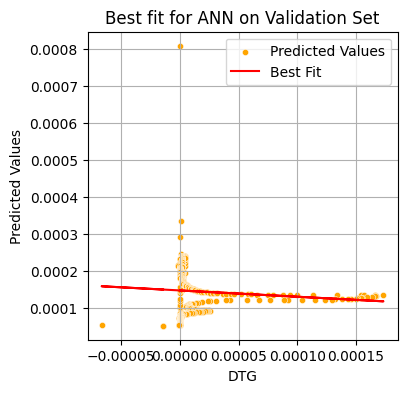

In [15]:
plt.figure(figsize=(4, 4))

# Plot the scatter plot with custom styling
sns.scatterplot(data=final_df, x='DTG', y='preditions', color='orange', label='Predicted Values', s=20)

# Plot the best fit line
plt.plot(x, a*x+b, color='red', label='Best Fit')

plt.title('Best fit for ANN on Validation Set')
plt.xlabel('DTG')
plt.ylabel('Predicted Values')
plt.legend()

# Add a grid background
plt.grid(True)

# Show the plot
plt.show()

In [16]:
df_test = dataframe.loc[dataframe['label'] == "Test"]
X_test =  df_test[['time', 'tem', 'heating rate']]
y_test = df_test['DTG']

predictions = model.predict(X_test)
prediction_test  = pd.DataFrame(predictions)
print('MSE',mean_squared_error(y_test,predictions))
print('RMSE',math.sqrt(mean_squared_error(y_test, predictions)))
print('MAE',mean_absolute_error(y_test,predictions))
print('R2_Score',r2_score(y_test,predictions))

13/13 [==============================] - 0s 2ms/step
MSE 2.2706972350057155e-08
RMSE 0.00015068832851305091
MAE 0.00013103448139045637
R2_Score -17.226236560039304


In [17]:
X_test_df = pd.DataFrame(X_test)
X_test_df = X_test_df.reset_index(drop = True)
prediction = pd.DataFrame(predictions)
y_test_df =  pd.DataFrame(y_test)
y_test_df = y_test_df.reset_index(drop= True)
final_df_test = pd.concat([X_test_df,prediction,y_test_df],axis =1)
final_df_test.rename(columns={0: "predictions_test"}, errors="raise",inplace =  True)
final_df_test

,time,tem,heating rate,predictions_test,DTG
0,0.000015,0.066519,0.997785,0.000720,1.807016e-07
1,0.000225,0.257663,0.966235,0.000355,6.977295e-07
2,0.000485,0.371391,0.928477,0.000299,0.000000e+00
3,0.001150,0.544988,0.838443,0.000206,1.464476e-06
4,0.001458,0.599999,0.799999,0.000175,1.608853e-06
...,...,...,...,...,...
401,0.069281,0.997485,0.014929,0.000054,-8.580666e-07
402,0.069359,0.997481,0.014884,0.000053,-8.564689e-07
403,0.069380,0.997479,0.014873,0.000053,-8.560859e-07
404,0.069510,0.997471,0.014810,0.000052,-1.440581e-05


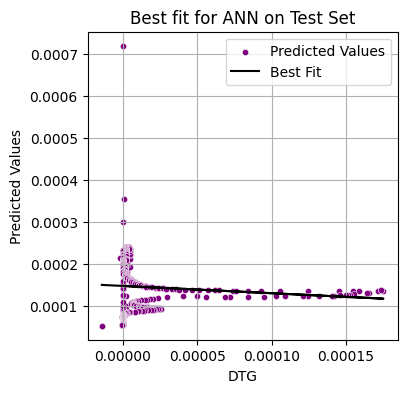

In [19]:
plt.figure(figsize=(4, 4))

# Plot the scatter plot with custom styling
sns.scatterplot(data=final_df_test, x='DTG', y='predictions_test', color='purple', label='Predicted Values', s=20)

# Plot the best fit line
plt.plot(x, a*x+b, color='black', label='Best Fit')

plt.title('Best fit for ANN on Test Set')
plt.xlabel('DTG')
plt.ylabel('Predicted Values')
plt.legend()

# Add a grid background
plt.grid(True)

# Show the plot
plt.show()

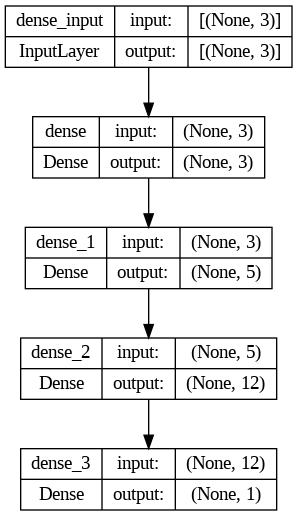

In [20]:
plot_model(model, to_file='/content/model.jpg',show_shapes=True)